## MBIO 691I Project Instructions
### Summary
We expect tropical coral cover to decline globally over the coming century, due to a combination of rapidly warming ocean temperatures and ocean acidification. The file `coral_model.csv` contains output from some ecological-evolutionary simulations predicting changes in coral cover between 2010-2020, and 2090-2100 (see [here](https://www.biorxiv.org/content/10.1101/2024.07.23.604846v1.full) for details, although this is *not* required reading for this project). The simulations cover around 52,000 sites. 12 different simulation configurations were run, each with slightly different future climate change predictions (due to uncertainty in future warming/ocean acidification). This CSV file contains the following data:

* **coral_cover_2020/2100**: Simulation estimates of tropical coral cover averaged across 2010-2020, and 2090-2100 respectively (km $^2$).
* **SST_2020/SST_2100**: Mean SST (sea-surface temperature) averaged across 2010-2020, and 2090-2100 respectively (degrees C).
* **SST_seasonal**: Amplitude of the seasonal SST cycle, i.e. difference between summer and winter SST (degrees C).
* **pH_2020/pH_2100**: Mean pH averaged across 2010-2020, and 2090-2100 respectively.
* **PAR**: Benthic Photosynthetically Available Radiation (mol m $^{-2}$ d $^{-1}$ ).
* **longitude/latitude**: Longitude/latitude of the site.
* **model**: Simulation configuration, numbered 0-11.

### Your task
#### Part 1
Create a public Github repository. Throughout Part 2, track your code development using Git commits and commit messages appropriately. After you have produced your three figures, ensure you have pushed your commits (including the scripts and figures) to GitHub. Create a readme file for the repository, explaining what the scripts do, and how others can reproduce your work.

#### Part 2
Your task is to **visually summarise the output of these simulations** in **three figures of your choice**. The analyses and figures you produce are up to you, but here are some suggestions:
* A map showing the predicted percentage change in coral cover over the 21st century, averaged across simulations.
* A map showing variability in model predictions across the 12 configurations (e.g. where the configurations closely agree, and where they differ).
* A plot showing the predicted percentage change in coral cover over the 21st century (averaged across simulations) as a function of latitude.
* A plot showing the predicted percentage change in coral cover over the 21st century (averaged across simulations) as a function of the SST and/or pH change and/or seasonal cycle in SST.
* A plot investigating which explanatory variable is most important for predicting the simulated percentage change in coral cover over the 21st century.
* A plot showing the predicted percentage change in coral cover over the 21st century (averaged across simulations) as a function of the pH change.
* A plot comparing the mean predicted percentage change in coral cover over the 21st century between configurations.
* A plot showing the frequency density distribution of the change in coral cover over the 21st century across sites (possibly comparing between configurations or between regions).
* A plot showing the change in the [joint frequency density distribution](https://seaborn.pydata.org/examples/joint_kde.html) of coral cover as a function of SST and pH, between the start and end of the 21st century.

Each figure should be **exported as a publication-quality image file** (decide whether a raster or vector format is more appropriate) and should be accompanied by a caption of **up to 100 words each**. Each figure should have a file size of _at most_ 5 MB (maps) or 1 MB (all other figure types). There is no need to use any python packages that have not been discussed in this course; you will be assessed on the quality and clarity of your figures and code, *not* how sophisticated your data analyses are. However, if you are confident with statistics and would like to do some basic statistical modelling, you may be interested in the [statsmodels package](https://www.statsmodels.org/stable/index.html) and/or [scikit-learn](https://scikit-learn.org/stable/) (there is no obligation to do this, and this will not improve your grade). You may use matplotlib and/or seaborn, or any other (Python) plotting package you choose.

Analyses and plotting can be carried out using a Python script (.py) or jupyter notebook (.ipynb). However, if you use a jupyter notebook, please still export your figures as separate image files.

### Submission
Please submit your work, through a link to the public Github repository, **by 12 pm (midday) on Monday 4th November**. Please email this link to Phil Patton (pattonp@hawaii.edu), CC'ing Noam Vogt-Vincent (nvogt@hawaii.edu) and Lisa McManus (mcmanusl@hawaii.edu). Late submissions will lose 10% of their point value per day, unless you contact us beforehand for an extension.

### Grading rubric
**A**: You have produced three, high-quality data visualisations in an appropriate file format(s). The visualisations are clear and well thought-out, communicating useful and correct insights into the provided dataset. The code used to run analyses and plot data run without errors, are correct, and are clear to read through comprehensive and useful comments. Code has been made available in a public Github repository, which has been appropriately documented with a readme file. 

**B**: You have produced three data visualisations in an appropriate file format(s). The visualisations communicate useful and correct insights into the provided dataset, but may have some clarity or accessibility issues (e.g. labels are difficult to read, colour maps that do not distinguish well between data). The code used to run analyses and plot data run without errors, are correct, and are mostly clear to read through comments. Code has been made available in a public Github repository, which has been appropriately documented with a readme file.

**C**: You have produced three data visualisations. The visualisations communicate correct insights into the provided dataset, although they may not be completely useful (e.g. plotting a relationship between data without a good biological justification) or clear. The code used to run analyses and plot data run without errors, but may be difficult to read and/or have minor analytical mistakes. Code has been made available in a public Github repository, with some effort to write a readme file.

### Academic integrity
Please follow the guidelines given in the course syllabus and lectures. You can use any online resources, and you are free to adapt code samples found online for plotting. You do not need to cite these code samples *unless* they are doing something clearly novel that goes beyond the normal capabilities of plotting/analysis packages used.

### Sample code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
import seaborn as sns
import pandas as pd


# Load the dataset
data = pd.read_csv('data/coral_forecast.csv', skiprows=[1])

# Group data by site
# Sites are characterised by a unique (lon, lat) combination. To group sites together, 
# we can firstly create a new column with the combined longitude and latitude.
data['lon_lat'] = list(zip(data.longitude, data.latitude))

# We can now perform groupby operations, e.g. computing mean values across all models
data = data.groupby('lon_lat').mean().drop(columns='model')

# Display a summary
data

,coral_cover_2020,coral_cover_2100,SST_2020,SST_2100,SST_seasonal,pH_2020,pH_2100,PAR,longitude,latitude
lon_lat,,,,,,,,,,
"(-179.91667, -18.976564)",0.694929,0.324930,26.702327,27.890377,4.175415,8.083792,7.929622,21.533913,-179.91667,-18.976564
"(-179.91667, -16.915445)",0.228116,0.119171,27.424381,28.586075,3.623840,8.078629,7.927397,26.394522,-179.91667,-16.915445
"(-179.91667, -16.835701)",0.016680,0.008415,27.450827,28.608507,3.581308,8.078629,7.927397,21.586466,-179.91667,-16.835701
"(-179.91667, -16.755922)",0.083758,0.040770,27.477278,28.630988,3.536575,8.078505,7.927513,20.342180,-179.91667,-16.755922
"(-179.91667, -16.676111)",0.231752,0.108068,27.510224,28.661344,3.503486,8.077856,7.926955,18.315748,-179.91667,-16.676111
...,...,...,...,...,...,...,...,...,...,...
"(179.91667, -16.676111)",1.301659,0.534694,27.466917,28.644631,3.632398,8.078169,7.926430,14.818131,179.91667,-16.676111
"(179.91667, -16.596266)",1.203070,0.443368,27.546176,28.714790,3.571132,8.078166,7.926561,13.101155,179.91667,-16.596266
"(179.91667, -16.436476)",2.034085,0.901328,27.660819,28.828506,3.497231,8.076627,7.925319,17.382680,179.91667,-16.436476


**(1) A map showing the predicted percentage change in coral cover over the 21st century, averaged across simulations.**

Coral Cover 2100
count    52872.000000
mean         0.320567
std          0.439889
min          0.000000
25%          0.028787
50%          0.136984
75%          0.435582
max          3.681176
Name: coral_cover_2100, dtype: float64

Coral Cover 2020
Data Shape: (52872, 11)
count    5.287200e+04
mean     1.074235e+00
std      1.140223e+00
min      1.012214e-07
25%      1.692654e-01
50%      6.488227e-01
75%      1.660526e+00
max      6.235368e+00
Name: coral_cover_2020, dtype: float64

                          coral_cover_2020  coral_cover_2100   SST_2020   SST_2100  ...        PAR  longitude   latitude  percent_change
lon_lat                                                                             ...                                                 
(-179.91667, -18.976564)          0.694929          0.324930  26.702327  27.890377  ...  21.533913 -179.91667 -18.976564      -53.242741
(-179.91667, -16.915445)          0.228116          0.119171  27.424381  28.586075  ...  26.394522 

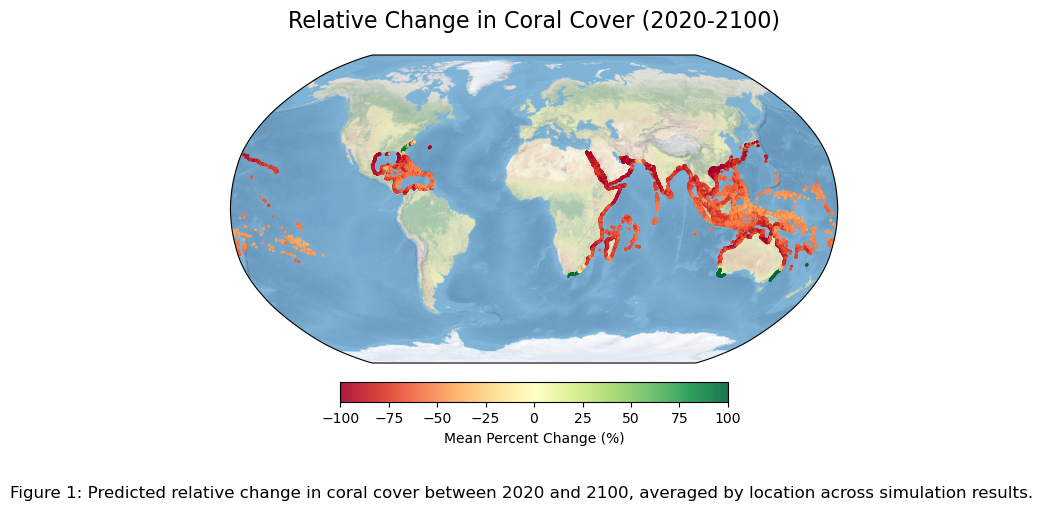

In [322]:
# explore data set
print("Coral Cover 2100")
print(data['coral_cover_2100'].describe())  # summary of coral_cover_2100
print()
print("Coral Cover 2020")
print(f"Data Shape: {data.shape}")
print(data['coral_cover_2020'].describe())  # summary of coral_cover_2020
print()

# note: assuming ideal conditions and focusing on a fast-growing species, coral could potentially grow 5-10 cm/yr, or 4-8m by 2100,
# therefore it is possible to see up to 80 times coral cover increase (400% increase) under optimal conditions.

# filter simulation results if coral_cover_2020 <= 0 to avoid undefined errors, values very close to zero are averaged later to prevent skew
filt_data = data[data['coral_cover_2020'] > 0].copy()
print(filt_data) 

# check filter application
print("Filter Coral Cover 2020")
print(f"Filter Data Shape: {filt_data.shape}")
print(filt_data['coral_cover_2020'].describe())  # summary of filtered coral_cover_2020
print()

# append new column to filtered df calculating % change in coral cover (2020 to 2100)
filt_data['percent_change'] = ((filt_data['coral_cover_2100'] - filt_data['coral_cover_2020']) / filt_data['coral_cover_2020']) * 100

# check percent_change calcs for missing values
print("Calc Summary:")
check_values = filt_data['percent_change'].isnull().sum()
print(f"Missing values in percent_change column: {check_values}")

# check calculation validity
coral_gain = (filt_data['percent_change'] > 0).sum()
print(f"Count of simulation instances predicting coral increase: {coral_gain}")
coral_loss = (filt_data['percent_change'] < 0).sum()
print(f"Count of simulation instances predicting coral decrease: {coral_loss}")
print()

# grouping by location to calculate average percent cover and reduce large outliers
m_percent_change = filt_data.groupby(['longitude', 'latitude'])['percent_change'].mean().reset_index()
print(m_percent_change)

# modify cartopy example "Global Robinson Project" to create a background for geospatial plotting
# initialize plot
def main():
    # set figure size
    fig = plt.figure(figsize=(10, 5)) 
    
    # creating figure
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson()) # add oval border for subplot area
    ax.stock_img() # add globe stock image

    # plot mean percent_change calcs using scatter function and set divergent color scheme
    scatter = ax.scatter(m_percent_change['longitude'], m_percent_change['latitude'], c=m_percent_change['percent_change'], 
        cmap='RdYlGn',     # colormap value
        vmin=-100,      # set percent change min
        vmax=100,       # set percent change max
        marker='o',     # set marker type 
        s=1,            # set marker size
        alpha=0.9,      # set marker opacity
        transform=ccrs.PlateCarree() # specify cordinate system
        )     
   
    # label plot 
    cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05, shrink=0.5)
    cbar.set_label('Mean Percent Change (%)')
    plt.title('Relative Change in Coral Cover (2020-2100)', 
          fontsize=16, loc='center', pad=20, color='black')

    # add caption
    plt.figtext(0.5, 0.02, 'Figure 1: Predicted relative change in coral cover between 2020 and 2100, averaged by location across simulation results.', 
                ha='center', va='top', fontsize=12)

    # export as vector file
    plt.savefig('percent_change_CC.svg', format='svg', bbox_inches='tight')

    plt.show()

# plot
main()

**(2) A plot showing the predicted percentage change in coral cover over the 21st century (averaged across simulations) as a function of latitude.**

       latitude  percent_change
0    -37.495780      846.209002
1    -37.429638      383.270971
2    -37.363434      580.004229
3    -37.297170      818.414755
4    -37.230850     1030.245785
...         ...             ...
8474  35.278114      -43.706718
8475  35.278900      -61.654099
8476  35.290485     -100.000000
8477  35.341640      -93.468051
8478  35.342438      -87.242619

[8479 rows x 2 columns]
count    8479.000000
mean      -60.515728
std        90.762589
min      -100.000000
25%       -95.210996
50%       -80.325521
75%       -64.546017
max      1807.020237
Name: percent_change, dtype: float64

count    8112.000000
mean      -76.595308
std        27.028596
min      -100.000000
25%       -95.758793
50%       -82.089128
75%       -66.716961
max        99.445978
Name: percent_change, dtype: float64
       latitude  percent_change
0    -37.495780      846.209002
1    -37.429638      383.270971
2    -37.363434      580.004229
3    -37.297170      818.414755
4    -37.230850     

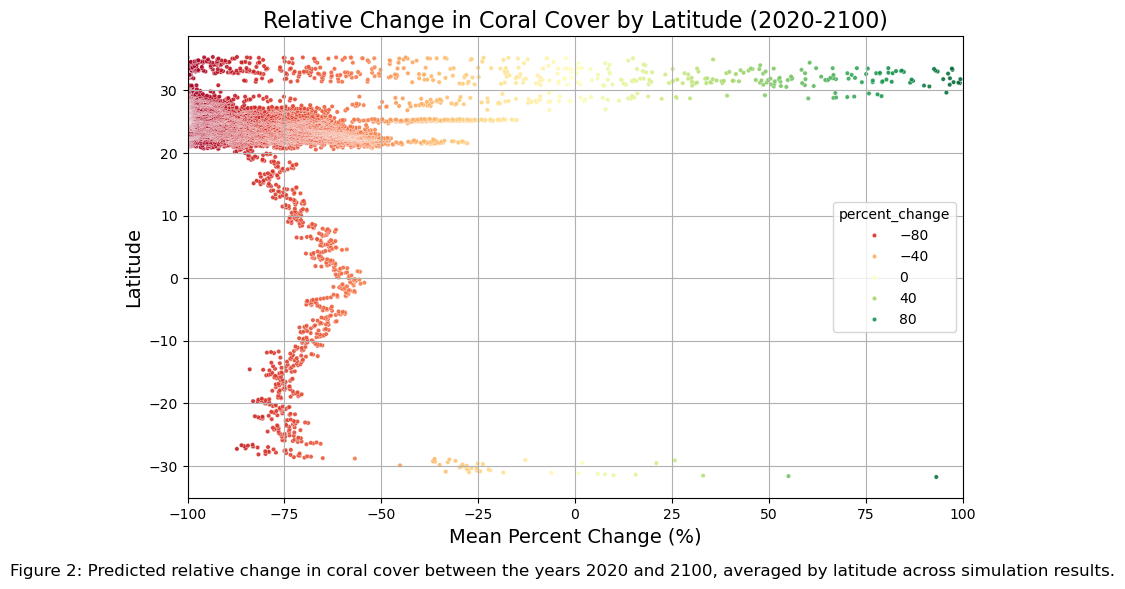

In [323]:
# grouping by latitude to calculate average percent cover
mean_pc_lat = filt_data.groupby(['latitude'])['percent_change'].mean().reset_index()
print(mean_pc_lat)
print(mean_pc_lat['percent_change'].describe())
print()

# filter outliers
filt_mean_pc_lat = mean_pc_lat[mean_pc_lat['percent_change'] <= 100]
print(filt_mean_pc_lat['percent_change'].describe())

# initalize plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filt_mean_pc_lat, x='percent_change', y='latitude', 
                hue='percent_change', 
                palette='RdYlGn', 
                s=10, 
                alpha=0.9
                )

# labels
plt.title('Relative Change in Coral Cover by Latitude (2020-2100)', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Mean Percent Change (%)', fontsize=14)
plt.grid(True)
plt.xlim(-100, 100)  
plt.grid(True)

# add caption
plt.figtext(0.5, 0.0, 'Figure 2: Predicted relative change in coral cover between the years 2020 and 2100, averaged by latitude across simulation results.', 
                ha='center', va='top', fontsize=12)

# export as vector file
plt.savefig('percent_change_CC_lat.svg', format='svg', bbox_inches='tight')

# plot
plt.show()